In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

ticker= "msft"
stock_data = yf.download(ticker, start="2016-01-04", end="2022-10-26")

[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.269142,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.493923,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,48.594845,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.904587,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,47.048447,48754000


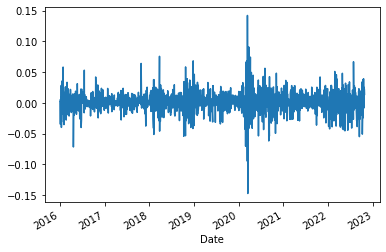

In [3]:
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'].plot()
plt.show()

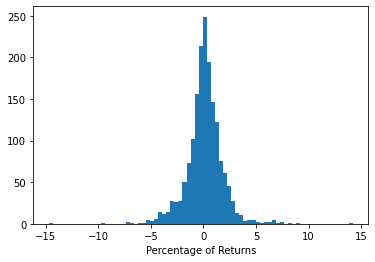

In [4]:
returns_percent = stock_data['Returns'] * 100
returns_percent.dropna(inplace=True)

plt.hist(returns_percent, bins=75)
plt.xlabel("Percentage of Returns")
plt.show()

In [5]:
daily_mean_returns = np.mean(stock_data['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.001101571918748795
Annual Mean Returns: 0.31975133947726064


In [6]:
daily_std = np.std(stock_data['Returns'])
annual_std = daily_std*np.sqrt(252)
print("Daily Standard Deviation " + str(daily_std))
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
annual_var = annual_std**2
print("Daily Variance " + str(daily_var))
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.017457466448772746
Annual Standard Deviation 0.27712868846823957


Daily Variance 0.0003047631348100261
Annual Variance 0.07680030997212658


In [7]:
returns = stock_data['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.04944832926218261


In [8]:
excess_kurtosis = kurtosis(returns)
print("Excess kurtosis: " + str(excess_kurtosis))

real_kurtosis = excess_kurtosis + 3
print("Real kurtosis: " + str(real_kurtosis))

Excess kurtosis: 8.118804082630554
Real kurtosis: 11.118804082630554
